In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dt=pd.read_csv('conversion_data.csv')
dt.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
dt.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


$Checking outlier$

In [7]:
dt=dt[dt['age']<80]

In [11]:
dt.age.value_counts()

30    14346
28    14341
29    14158
27    14084
26    13931
31    13692
32    13507
25    13460
24    12960
33    12631
23    12336
34    12108
22    11701
35    11471
21    10966
36    10779
20    10156
37     9761
19     9349
38     8970
18     8466
39     8202
17     7597
40     7148
41     6401
42     5588
43     4904
44     4224
45     3634
46     2994
47     2504
48     2121
49     1629
50     1356
51     1093
52      935
53      627
54      520
55      394
56      286
57      247
58      165
59      127
60       94
61       71
62       59
63       35
64       27
65       15
66        9
67        5
68        5
69        3
70        2
73        1
77        1
72        1
79        1
Name: age, dtype: int64

In [1]:
# Using plot show converstion/visit vs other variable
# 1. converstion/visit v.s. Country

In [16]:
ctry=dt.groupby('country').agg({"converted":{"count":"sum",
                                            "AVG":"mean"},
                               "total_pages_visited":{"count":"sum",
                                            "AVG":"mean"}})
ctry

converted           total_pages_visited          
            count       AVG               count       AVG
country                                                  
China         102  0.001332              348809  4.553523
Germany       815  0.062428               67755  5.189966
UK           2549  0.052612              246221  5.082066
US           6732  0.037801              878022  4.930160

In [25]:
ctry2=pd.pivot_table(dt, index=["country"], values=["converted", "total_pages_visited"],
                           aggfunc=[np.sum, np.mean], fill_value=0)
ctry2

sum                          mean                    
        converted total_pages_visited converted total_pages_visited
country                                                            
China         102              348809  0.001332            4.553523
Germany       815               67755  0.062428            5.189966
UK           2549              246221  0.052612            5.082066
US           6732              878022  0.037801            4.930160

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

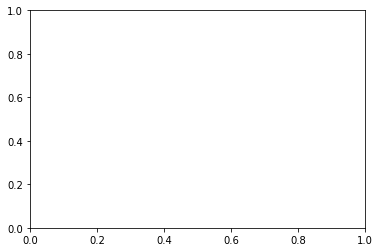

In [31]:
fig,ax=plt.subplots()
ax.bar()

ValueError: x and y must be the same size

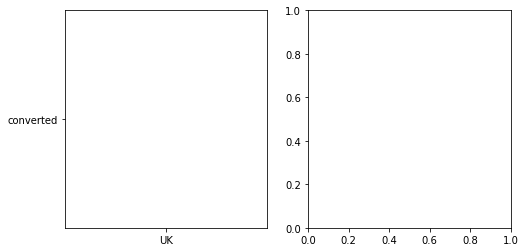

In [17]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.hist(dt['country'],['converted'])
ax1.scatter(dt.country,dt.total_pages_visited)
plt.show()

display(HTML(static_report))